Просьба выбрать правильный вариант ответа. 



**1. Какие стадии есть у дерева?** 

A) Training and Testing

B) Fit and Cease

C) Fit and Predict

D) Start and End

**Ответ**: C


**2. Какую функцию выполняет best cut?**

A) Максимизирует разнообразие

B) Минимизирует энтропию или дисперсию

C) Увеличивает скорость обучения

D) Снижает стоимость вычислений

**Ответ**: B

**3. После чего оканчивается тренировка?**

A) После заполнения всех узлов

B) При достижении абсолютной однородности либо после достижения лимитов, заданных гиперпараметрами

C) После проверки на тестовом наборе данных

D) Когда все признаки использованы

**Ответ**: B

**4. Основные гиперпараметры?**

A) learning_rate и n_estimators

B) max_depth и max_features

C) n_jobs и verbose

D) beta_1 и beta_2

**Ответ**: B


**5. Через что можно оценить важность каждого отдельного признака?**

A) through_importance

B) feature_importance

C) importance_score

D) feature_significance

**Ответ**: B

**6. Какие гиперпараметры отвечают за то, чтобы модель не переобучалась?** 

A) learning_rate, n_estimators

B) min_samples_split, min_samples_leaf, max_leaf_nodes

C) beta_1, beta_2, epsilon

D) solver, alpha, random_state

**Ответ**: B

**7. Как происходит процесс принятия решения в дереве решений при предсказании класса или значения для новой записи?** 

A. Новая запись сравнивается с каждым классом в корневом узле, и на основании наибольшего сходства присваивается класс.

B. Алгоритм случайным образом выбирает узел для каждой новой записи и присваивает ей класс этого узла.

C. Каждая новая запись проходит через дерево, начиная от корневого узла и отвечая на вопросы в каждом узле, пока не достигнет листа, где ей присваивается класс листа (в случае классификации) или среднее значение листа (в случае регрессии).

D.Для каждой новой записи алгоритм вычисляет среднее значение всех классов в дереве и присваивает это значение записи.

**Ответ**: C

**8. Как определяется результат в конечных узлах (листах) дерева решений после его обучения?**

A. В конечных узлах результат определяется на основе медианного значения всех записей в листе независимо от типа задачи (классификация или регрессия).

B. В случае классификации в конечном узле результат задается классом, который был случайно выбран из записей в листе, а в случае регрессии — средним значением.

C. В конечных узлах (листах) результат для задачи классификации задается классом большинства записей в листе, а для задачи регрессии — средним значением всех записей в листе.

D. Результат в конечных узлах определяется на основе наименьшего значения всех записей в листе для классификации и на основе наибольшего значения для регрессии.

**Ответ**: C

**После того как ответили на тестовые вопросы, просьба выполнить следующее задание:**

Оценка важности признаков с использованием решающего дерева на датасете California Housing



**Цель задания**: Используя датасет California Housing, создайте модель решающего дерева для прогнозирования медианных цен на дома. Ваша задача — оценить важность признаков, используя обученную модель, идентифицировать наиболее значимые признаки для прогноза цен на жилье и провести детальный анализ вклада каждого признака.



**Шаги выполнения:**

**Загрузка и подготовка данных:**

Используйте функцию fetch_california_housing из sklearn.datasets для загрузки датасета California Housing.

Создайте DataFrame из полученных данных и назначьте имена колонок, используя атрибут feature_names загруженного датасета.



**Разделение данных на тренировочную и тестовую выборки**:

Разделите данные на тренировочную и тестовую выборки с использованием функции train_test_split из sklearn.model_selection. Установите размер тестовой выборки в 20%.



**Создание и обучение модели решающего дерева**:

Используйте DecisionTreeRegressor из sklearn.tree для создания модели решающего дерева. Установите random_state для воспроизводимости результатов.

Обучите модель на тренировочных данных.



**Оценка важности признаков**:

Получите важности признаков из обученной модели, используя атрибут feature_importances_.

Используйте имена признаков из датасета, чтобы создать словарь, где ключами будут имена признаков, а значениями — их важности.



**Анализ результатов**:

Выведите признаки и их важности в порядке убывания, используя код:

for feature, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):

 print(f"{feature}: {importance}")

Этот шаг поможет вам определить, какие признаки модель считает наиболее важными для прогнозирования цены на жилье, и позволит провести детальный анализ вклада каждого признака.

(Опционально) Визуализируйте важность признаков с помощью графика, чтобы лучше понять их вклад в модель. Это может быть полезно для визуального представления относительной значимости признаков.



In [34]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


data = fetch_california_housing()
dataset = pd.DataFrame(data.data, columns=data.feature_names)
dataset['target'] = data.target

X = dataset.drop(columns='target')
y = dataset['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model = DecisionTreeRegressor(random_state=21)
model.fit(X_train, y_train)

importances = model.feature_importances_
importances_dict = {model.feature_names_in_[i]: importances[i] for i in range(len(importances))}

In [35]:
importances_dict

{'MedInc': 0.5267297735579808,
 'HouseAge': 0.0512064099834076,
 'AveRooms': 0.04657108858668088,
 'AveBedrms': 0.027467377808691545,
 'Population': 0.030643604438308766,
 'AveOccup': 0.13231683198322866,
 'Latitude': 0.09461481923596624,
 'Longitude': 0.09045009440573545}

In [36]:
for x,y in sorted(importances_dict.items(), key=lambda x:x[1],reverse=True):
    print(f"{x}:{y}")

MedInc:0.5267297735579808
AveOccup:0.13231683198322866
Latitude:0.09461481923596624
Longitude:0.09045009440573545
HouseAge:0.0512064099834076
AveRooms:0.04657108858668088
Population:0.030643604438308766
AveBedrms:0.027467377808691545


[0 5 6 7 1 2 4 3]


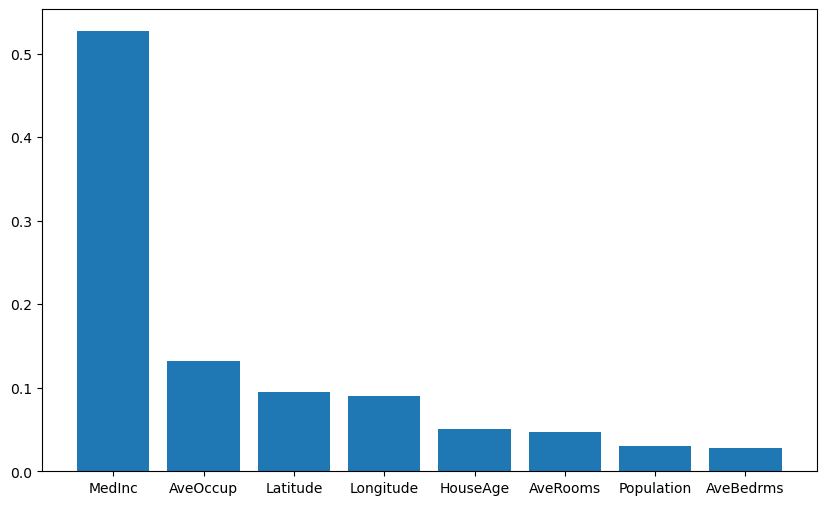

In [42]:
indices = np.argsort(importances)[::-1]
print(indices)


plt.figure(figsize=(10,6))
plt.bar(model.feature_names_in_[indices], importances[indices])
plt.show()